<a href="https://colab.research.google.com/github/Ibnuamrithaher/Deep-Learning/blob/main/13%20-%20Neural%20Network/Part%208%20-%20Callback%20and%20more%20ML%20engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jcopdl 'jcopdl==1.1.10'

In [6]:
!unzip "data.zip"

Archive:  data.zip
replace data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [3]:
import torch
from torch import nn, optim
import jcopdl

from jcopdl.callback import Callback, set_config
jcopdl.__version__


'1.1.10'

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

## **Dataset & Dataloader**

In [7]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [35]:
batch_size =128

transform = transforms.Compose({
    transforms.Grayscale(),
    transforms.ToTensor()
})

train_set = datasets.ImageFolder("data/train/", transform=transform)
trainloader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=0)

test_set = datasets.ImageFolder("data/test/", transform=transform)
testloader = DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=0)

In [36]:
images, labels = next(iter(trainloader))
images.shape

torch.Size([128, 1, 28, 28])

In [37]:
label2category = train_set.classes
label2category

['Ankle boot',
 'Bag',
 'Coat',
 'Dress',
 'Pullover',
 'Sandal',
 'Shirt',
 'Sneaker',
 'T-shirt or Top',
 'Trouser']

## **Arsitektur & Config**

In [38]:
from jcopdl.layers import linear_block

In [45]:
class FashionClassifier(nn.Module):
  def __init__(self, input_size, n1, n2, output_size, dropout=0.2):
    super().__init__()
    self.fc = nn.Sequential(
        nn.Flatten(),
        linear_block(input_size,n1, dropout=dropout),
        linear_block(n1,n2, dropout=dropout),
        linear_block(n2,output_size, activation="lsoftmax"),
    )


  def forward(self, x):
    return self.fc(x)

In [46]:
config = set_config({
    "input_size":784,
    "n1":256,
    "n2":64,
    "output_size":len(train_set.classes),
    "dropout":0.2,
})

## **Training Preparation -> MCOC**

In [47]:
model = FashionClassifier(config.input_size, config.n1, config.n2, config.output_size, config.dropout).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir="model")

## **Training**

In [48]:
from tqdm.auto import tqdm

In [49]:
def loop_fn(mode, dataset, dataLoader, model, criterion, optimizer, device):
    if mode == 'train':
        model.train()
    elif mode == "test":
        model.eval()
    cost = correct = 0
    for feature, target in tqdm(dataLoader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)

        if mode == 'train':
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc

Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     1
Train_cost  = 0.7446 | Test_cost  = 0.4682 | Train_score = 0.7355 | Test_score = 0.8349 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     2
Train_cost  = 0.4789 | Test_cost  = 0.4193 | Train_score = 0.8294 | Test_score = 0.8476 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     3
Train_cost  = 0.4220 | Test_cost  = 0.3959 | Train_score = 0.8488 | Test_score = 0.8527 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     4
Train_cost  = 0.3926 | Test_cost  = 0.3509 | Train_score = 0.8590 | Test_score = 0.8694 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     5
Train_cost  = 0.3704 | Test_cost  = 0.3440 | Train_score = 0.8684 | Test_score = 0.8733 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     6
Train_cost  = 0.3554 | Test_cost  = 0.3334 | Train_score = 0.8721 | Test_score = 0.8786 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     7
Train_cost  = 0.3387 | Test_cost  = 0.3348 | Train_score = 0.8794 | Test_score = 0.8762 |
==> EarlyStop patience =  1 | Best test_score: 0.8786


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     8
Train_cost  = 0.3309 | Test_cost  = 0.3590 | Train_score = 0.8792 | Test_score = 0.8627 |
==> EarlyStop patience =  2 | Best test_score: 0.8786


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch     9
Train_cost  = 0.3197 | Test_cost  = 0.3204 | Train_score = 0.8842 | Test_score = 0.8807 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    10
Train_cost  = 0.3088 | Test_cost  = 0.3168 | Train_score = 0.8854 | Test_score = 0.8850 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    11
Train_cost  = 0.2990 | Test_cost  = 0.3379 | Train_score = 0.8912 | Test_score = 0.8783 |
==> EarlyStop patience =  1 | Best test_score: 0.8850


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    12
Train_cost  = 0.2916 | Test_cost  = 0.3238 | Train_score = 0.8923 | Test_score = 0.8825 |
==> EarlyStop patience =  2 | Best test_score: 0.8850


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    13
Train_cost  = 0.2842 | Test_cost  = 0.3110 | Train_score = 0.8946 | Test_score = 0.8883 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    14
Train_cost  = 0.2791 | Test_cost  = 0.3161 | Train_score = 0.8984 | Test_score = 0.8853 |
==> EarlyStop patience =  1 | Best test_score: 0.8883


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    15
Train_cost  = 0.2760 | Test_cost  = 0.3129 | Train_score = 0.8986 | Test_score = 0.8877 |
==> EarlyStop patience =  2 | Best test_score: 0.8883


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    16
Train_cost  = 0.2668 | Test_cost  = 0.3109 | Train_score = 0.9005 | Test_score = 0.8887 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    17
Train_cost  = 0.2664 | Test_cost  = 0.3173 | Train_score = 0.9032 | Test_score = 0.8855 |
==> EarlyStop patience =  1 | Best test_score: 0.8887


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    18
Train_cost  = 0.2579 | Test_cost  = 0.3150 | Train_score = 0.9054 | Test_score = 0.8881 |
==> EarlyStop patience =  2 | Best test_score: 0.8887


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    19
Train_cost  = 0.2518 | Test_cost  = 0.3201 | Train_score = 0.9067 | Test_score = 0.8852 |
==> EarlyStop patience =  3 | Best test_score: 0.8887


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    20
Train_cost  = 0.2512 | Test_cost  = 0.3090 | Train_score = 0.9057 | Test_score = 0.8909 |


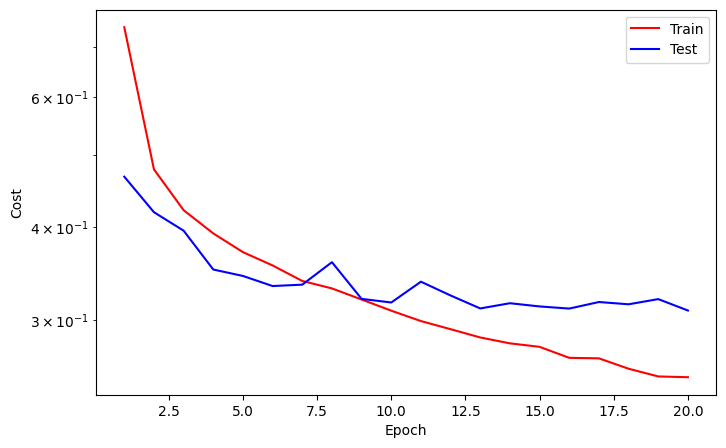

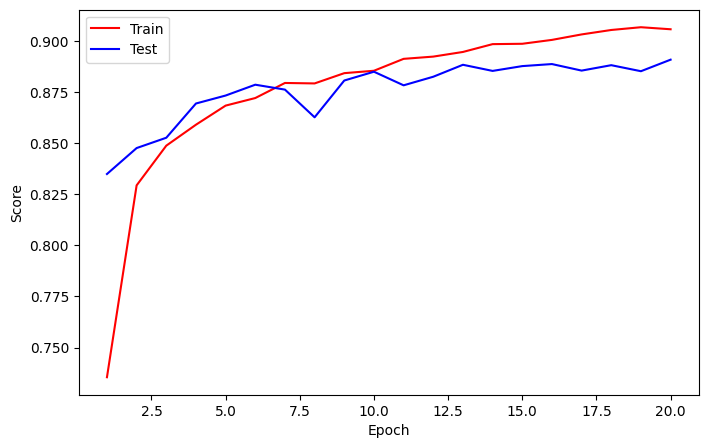

Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    21
Train_cost  = 0.2436 | Test_cost  = 0.3103 | Train_score = 0.9094 | Test_score = 0.8870 |
==> EarlyStop patience =  1 | Best test_score: 0.8909


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    22
Train_cost  = 0.2406 | Test_cost  = 0.3161 | Train_score = 0.9095 | Test_score = 0.8872 |
==> EarlyStop patience =  2 | Best test_score: 0.8909


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    23
Train_cost  = 0.2353 | Test_cost  = 0.3059 | Train_score = 0.9114 | Test_score = 0.8950 |


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    24
Train_cost  = 0.2305 | Test_cost  = 0.3127 | Train_score = 0.9148 | Test_score = 0.8921 |
==> EarlyStop patience =  1 | Best test_score: 0.8950


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    25
Train_cost  = 0.2315 | Test_cost  = 0.3203 | Train_score = 0.9145 | Test_score = 0.8891 |
==> EarlyStop patience =  2 | Best test_score: 0.8950


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    26
Train_cost  = 0.2250 | Test_cost  = 0.3091 | Train_score = 0.9165 | Test_score = 0.8922 |
==> EarlyStop patience =  3 | Best test_score: 0.8950


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    27
Train_cost  = 0.2229 | Test_cost  = 0.3164 | Train_score = 0.9163 | Test_score = 0.8905 |
==> EarlyStop patience =  4 | Best test_score: 0.8950


Train:   0%|          | 0/313 [00:00<?, ?it/s]

Test:   0%|          | 0/157 [00:00<?, ?it/s]


Epoch    28
Train_cost  = 0.2208 | Test_cost  = 0.3197 | Train_score = 0.9175 | Test_score = 0.8921 |
==> EarlyStop patience =  5 | Best test_score: 0.8950
==> Execute Early Stopping at epoch: 28 | Best test_score: 0.8950
==> Best model is saved at model


/usr/local/lib/python3.11/dist-packages/jcopdl/callback/_callback.py:104: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(f'{self.outdir}/weights_best.pth

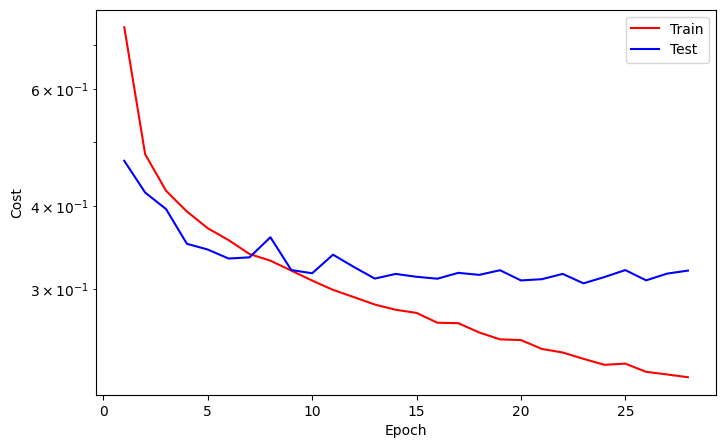

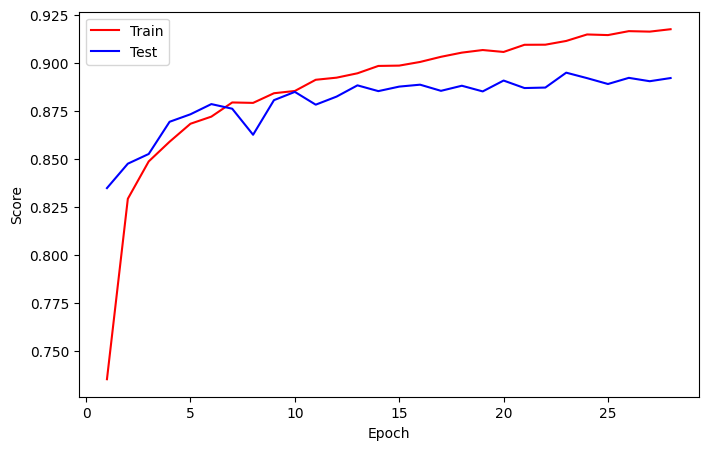

In [50]:
while True:
    train_cost, train_score = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)

    # Logging
    callback.log(train_cost, test_cost, train_score, test_score)

    # Chekpoint
    callback.save_checkpoint()

    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()

    # Early Stopping
    if callback.early_stopping(model, monitor="test_score"):
        callback.plot_cost()
        callback.plot_score()
        break

## **Load best Model**

In [51]:
# weight = torch.load("model/weights_best.pth", map_locatopn="cpu")
# config = torch.load("model/configs.pth", map_location="cpu")

# model = FashionClassifier(config.input_size, config.n1, config.n2, config.output_size, config.dropout).to(device)
# model.load_state_dict(weight)
# model = model.to(device)

In [52]:
model

FashionClassifier(
  (fc): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): LinearBlock(
      (block): Sequential(
        (linear): Linear(in_features=784, out_features=256, bias=True)
        (relu): ReLU()
        (do): Dropout(p=0.2, inplace=False)
      )
    )
    (2): LinearBlock(
      (block): Sequential(
        (linear): Linear(in_features=256, out_features=64, bias=True)
        (relu): ReLU()
        (do): Dropout(p=0.2, inplace=False)
      )
    )
    (3): LinearBlock(
      (block): Sequential(
        (linear): Linear(in_features=64, out_features=10, bias=True)
        (lsoftmax): LogSoftmax(dim=1)
      )
    )
  )
)

## **Predict**

In [53]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device)

In [54]:
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)
[label2category[pred] for pred in preds]

['T-shirt or Top',
 'Sneaker',
 'Shirt',
 'Sneaker',
 'Coat',
 'Shirt',
 'Ankle boot',
 'Coat',
 'Sandal',
 'Dress',
 'Pullover',
 'Ankle boot',
 'Pullover',
 'Shirt',
 'Shirt',
 'Ankle boot',
 'Sandal',
 'Coat',
 'Bag',
 'Trouser',
 'Ankle boot',
 'Ankle boot',
 'Trouser',
 'Dress',
 'Sneaker',
 'Sandal',
 'Trouser',
 'Sneaker',
 'T-shirt or Top',
 'Coat',
 'Sandal',
 'Sandal',
 'Sneaker',
 'Pullover',
 'T-shirt or Top',
 'Sandal',
 'Sneaker',
 'Trouser',
 'Shirt',
 'Trouser',
 'Dress',
 'Pullover',
 'Coat',
 'Trouser',
 'Trouser',
 'T-shirt or Top',
 'Ankle boot',
 'T-shirt or Top',
 'Sandal',
 'Pullover',
 'Ankle boot',
 'Trouser',
 'Dress',
 'Ankle boot',
 'Trouser',
 'Dress',
 'Ankle boot',
 'Ankle boot',
 'Dress',
 'Sneaker',
 'Dress',
 'Coat',
 'Pullover',
 'Ankle boot',
 'Sandal',
 'Bag',
 'Dress',
 'Pullover',
 'Pullover',
 'Sandal',
 'Dress',
 'Sneaker',
 'T-shirt or Top',
 'Sneaker',
 'Sneaker',
 'Trouser',
 'T-shirt or Top',
 'Trouser',
 'Trouser',
 'Trouser',
 'Pullover',


## **Visualisasi**

In [55]:
import matplotlib.pyplot as plt

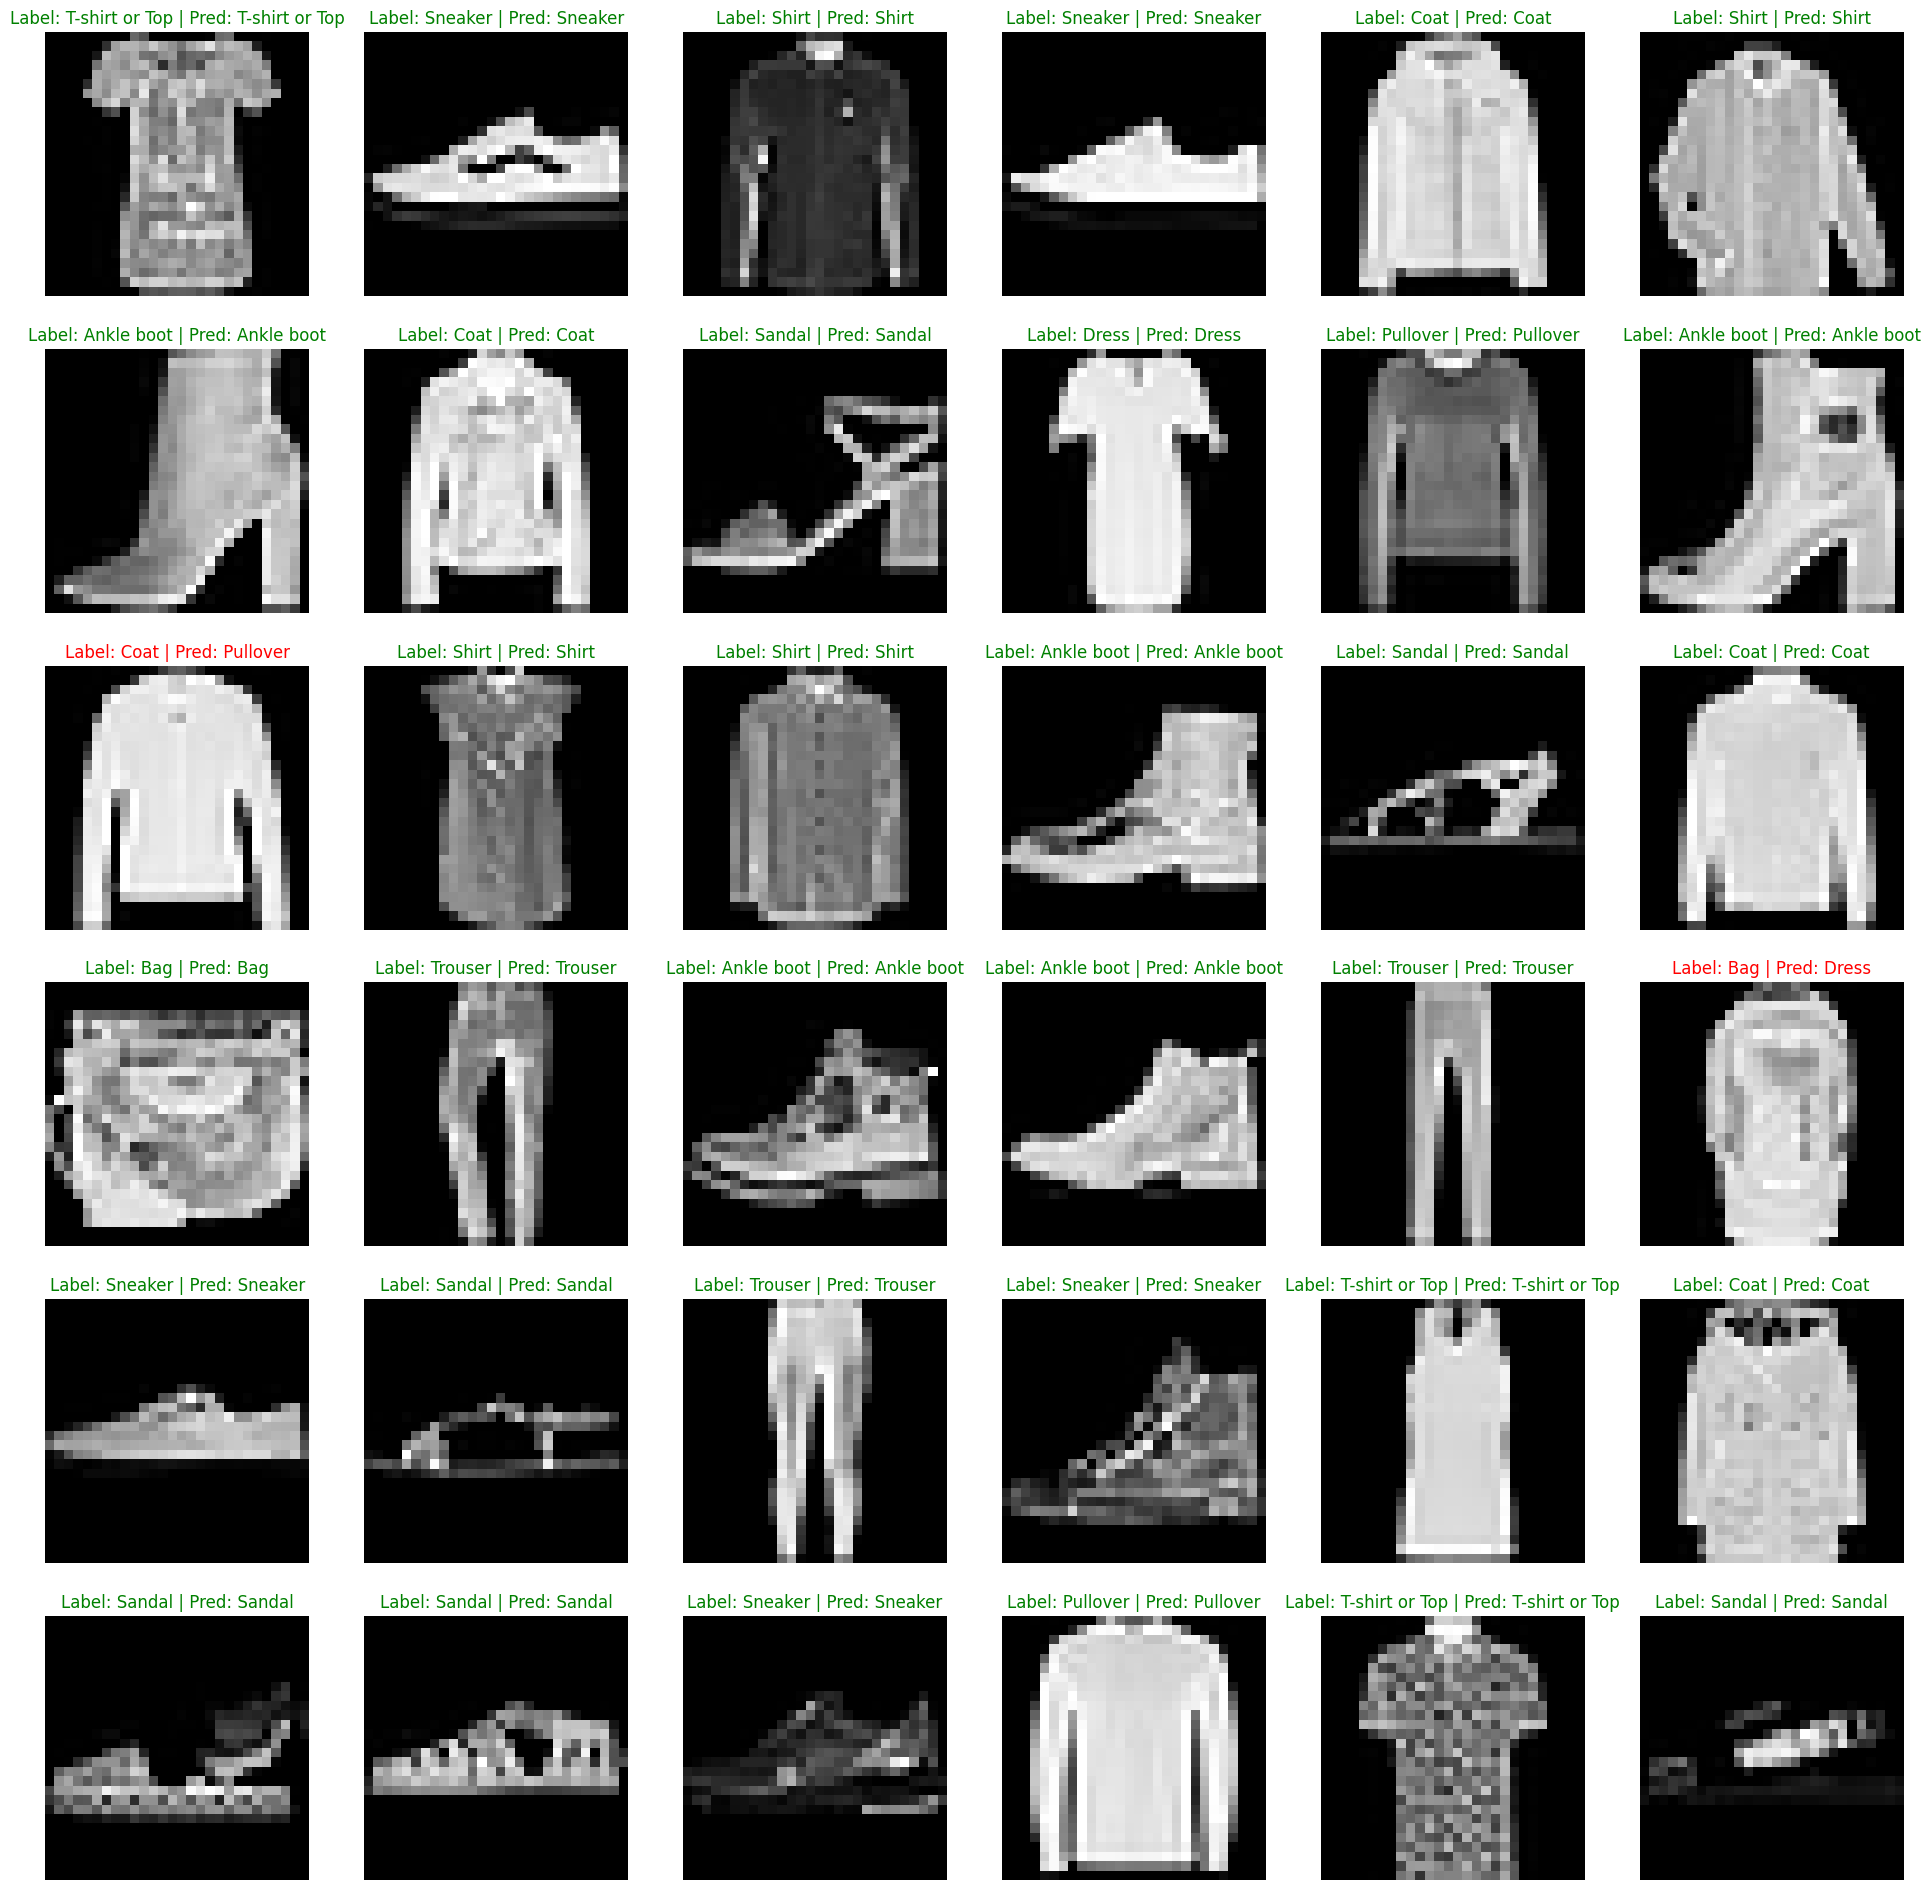

In [56]:
flg, axes = plt.subplots(6,6, figsize=(24,24))
for img, label, pred, ax in zip(feature, target, preds, axes.flatten()):
    ax.imshow(img.view(28,28).cpu(), cmap='gray')
    font = {"color":"r"} if label != pred else {"color":'g'}
    label, pred = label2category[label.item()], label2category[pred.item()]
    ax.set_title(f"Label: {label} | Pred: {pred}", fontdict=font);
    ax.axis('off')